# **Fitness Survey:**
Importing and Preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE  # For class balancing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

original = pd.read_csv("/content/drive/MyDrive/Resources/Data.csv")

mode_g = original["Gender"].mode()[0]
original["Gender"] = original["Gender"].replace("Other", mode_g)

mode_s = original["Stream"].mode()[0]
original["Stream"] = original["Stream"].replace("Other", mode_s)

print("\n Columns in a Dataset: \n", original.columns)
print("\n Any Null Values in a Dataset? ",original.isnull().values.any())

# Changing Columns (Preprocessing)
original['Age'] = pd.to_numeric(original['Age'])

gender_map = {
    "Male": 1,
    "Female": 0,
}

exercise_map = {
    "A. Rarely (0-1 times/week)": 0,
    "B. Sometimes (2-3 times/week)": 1,
    "C. Frequently (4+ times/week)": 2
}

activity_map = {
    "A. Mostly sedentary (desk job, minimal movement)": 0,
    "B. Moderately active (some walking/movement)": 1,
    "C. Very active (physical job, frequent exercise)": 2
}

exercise_duration_map = {
    "A. Less than 15 minutes": 0,
    "B. 15-30 minutes": 1,
    "C. More than 30 minutes": 2
}

motivation_map = {
    "Health & longevity": 2,
    "Weight loss / muscle gain": 1,
    "Stress relief / mental well-being": 1,
    "I don’t exercise": 0
}

importance_map = {
    "A. Very important": 2,
    "B. Somewhat important": 1,
    "C. Not important": 0
}

def map_health_conditions_checkbox(x):

    health_conditions = {
        "No pre-existing conditions": 0,
        "Heart disease": 1,
        "Hypertension": 1,
        "Diabetes": 1,
        "Asthma or breathing problems": 1
    }

    conditions = set(x.split(", "))

    return sum(health_conditions.get(condition.strip().split(". ", 1)[-1], 0) for condition in conditions)


sleep_map = {
    "A. Less than 5 hours": 0,
    "B. 5-7 hours": 1,
    "C. More than 7 hours": 2
}


challenge_map = {
    "Lack of motivation": 1,
    "Time constraints": 1,
    "Health issues": 2,
    "No challenges": 0
}

gym_map = {
    "A. Yes": 1,
    "B. No": 0
}

diet_map = {
    "Junk food consumption": 1,
    "Sugar intake" : 0
}

stress_map = {
    "Low" : 0,
    "Moderate" : 1,
    "High" : 2
}

def map_checkbox(x, mapping, default=0):
    if pd.isnull(x):
        return default
    score = 0
    options = [opt.strip().split('.', 1)[-1].strip() for opt in x.split(',')]
    for option in options:
        score += mapping.get(option, default)
    return score

# Mapping and Creating New Columns
original["Exercise Frequency"] = original['How often do you exercise?'].map(exercise_map)
original["Activity Level"] = original['Describe your daily routine'].map(activity_map)
original['exercise_duration'] = original['How long do you exercise daily?'].map(exercise_duration_map)
original['motivation_score'] = original['Your primary motivation for exercising?'].apply(map_checkbox, mapping=motivation_map)
original["Fitness Importance"] = original['Importance of Fitness for you'].map(importance_map)
original['health_condition_flag'] = original['Any pre-existing health conditions?  '].apply(map_health_conditions_checkbox)
original["Sleep Duration"] = original['On average, how many hours do you sleep per night?'].map(sleep_map)
original['challenge_score'] = original['What is the biggest challenge to staying consistent with exercise?'].apply(map_checkbox, mapping=challenge_map)
original['gym_interest'] = original['Would you consider joining a gym or fitness class in the next 6 months?'].map(gym_map)
original['Gender_num'] = original['Gender'].map(gender_map)
original['Diet_score'] = original['Dietary Habits?'].apply(map_checkbox, mapping=diet_map)
original['Stress_score'] = original['Stress Levels?'].apply(map_checkbox, mapping=stress_map)


def estimate_bmi(row):
    if row["Exercise Frequency"] == 0 and row["Activity Level"] == 0:
        return "High (Overweight/Obese)"
    elif row["Exercise Frequency"] == 1 and row["Activity Level"] == 1:
        return "Moderate (Borderline Overweight)"
    else:
        return "Normal"

bmi_map = {"Normal": 0,
           "Moderate (Borderline Overweight)": 1,
           "High (Overweight/Obese)": 2}

original["Estimated BMI"] = original.apply(estimate_bmi, axis=1)
original["Estimated BMI"] = original["Estimated BMI"].map(bmi_map)


original.drop(columns=['Stream','How often do you exercise?','Describe your daily routine','How long do you exercise daily?',
                 'Your primary motivation for exercising?','Importance of Fitness for you',
                 'What is the biggest challenge to staying consistent with exercise?',
                 'Gender','Would you consider joining a gym or fitness class in the next 6 months?',
                 'On average, how many hours do you sleep per night?',
                  'Dietary Habits?', 'Stress Levels?'
                 ], inplace=True)

print("\n",original.columns)
original.head()



 Columns in a Dataset: 
 Index(['Age', 'Gender', 'Stream', 'How often do you exercise?',
       'Describe your daily routine', 'How long do you exercise daily?',
       'Your primary motivation for exercising?',
       'Importance of Fitness for you',
       'Any pre-existing health conditions?  ',
       'On average, how many hours do you sleep per night?',
       'What is the biggest challenge to staying consistent with exercise?',
       'Would you consider joining a gym or fitness class in the next 6 months?',
       'Dietary Habits?', 'Stress Levels?'],
      dtype='object')

 Any Null Values in a Dataset?  False

 Index(['Age', 'Any pre-existing health conditions?  ', 'Exercise Frequency',
       'Activity Level', 'exercise_duration', 'motivation_score',
       'Fitness Importance', 'health_condition_flag', 'Sleep Duration',
       'challenge_score', 'gym_interest', 'Gender_num', 'Diet_score',
       'Stress_score', 'Estimated BMI'],
      dtype='object')


,Age,Any pre-existing health conditions?,Exercise Frequency,Activity Level,exercise_duration,motivation_score,Fitness Importance,health_condition_flag,Sleep Duration,challenge_score,gym_interest,Gender_num,Diet_score,Stress_score,Estimated BMI
0,19,E. No pre-existing conditions,1,1,1,1,2,0,0,1,1,1,1,2,1
1,16,C. Heart disease,2,1,2,4,2,1,0,1,0,1,1,1,0
2,20,E. No pre-existing conditions,1,2,0,1,1,0,0,1,0,0,1,1,0
3,19,D. Asthma or breathing problems,0,0,0,1,2,1,1,1,0,1,1,1,2
4,19,E. No pre-existing conditions,1,2,0,3,1,0,1,0,0,0,1,2,0


#**Feature and Target**

In [2]:
df = original

df['risk_score'] = ((2 - df['Exercise Frequency']) +
                    (2 - df['Activity Level']) +
                    (2 - df['exercise_duration']) +
                    (2 - df['Fitness Importance']) +
                    df['health_condition_flag'] +
                    (np.where(df['Sleep Duration'] == 0, 1, 0)) +
                    df['challenge_score'] +
                    df['Diet_score']  +
                    df['Stress_score'])


def categorize_risk(score):
    if score <= 4:
        return 0  # Low Risk
    elif score <= 6:
        return 1  # Moderate Risk
    else:
        return 2  # High Risk

df['health_risk'] = df['risk_score'].apply(categorize_risk)

print(df['health_risk'].value_counts())



features = ['Age', 'Exercise Frequency', 'Activity Level', 'exercise_duration',
       'motivation_score', 'Fitness Importance', 'health_condition_flag', 'Sleep Duration',
       'challenge_score', 'gym_interest', 'Gender_num']

X = df[features]
y = df['health_risk']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

health_risk
2    312
1    127
0     85
Name: count, dtype: int64


# **Objective 1:**
**Predict Future Health Risk**

# **Decision Tree**
(Training Accuracy)

Decision Tree Accuracy: 92.12%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        71
           1       0.86      0.82      0.84       107
           2       0.97      0.96      0.96       241

    accuracy                           0.92       419
   macro avg       0.90      0.90      0.90       419
weighted avg       0.92      0.92      0.92       419



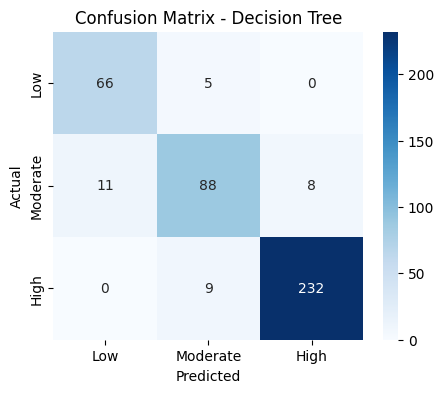

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=120, min_samples_split=15, random_state=40)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_train, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Moderate", "High"], yticklabels=["Low", "Moderate", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# **Decision Tree**
**(Test Accuracy)**



Decision Tree Accuracy: 89.52%

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       0.76      0.65      0.70        20
           2       0.97      0.94      0.96        71

    accuracy                           0.90       105
   macro avg       0.82      0.86      0.84       105
weighted avg       0.90      0.90      0.89       105



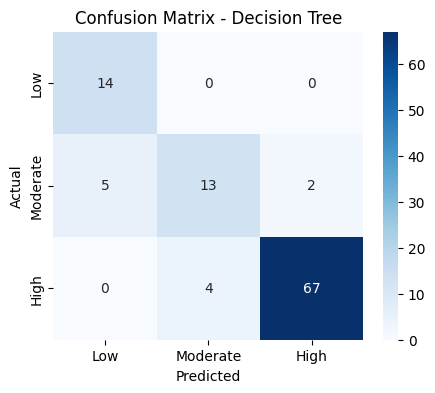

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=120, min_samples_split=15, random_state=40)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Moderate", "High"], yticklabels=["Low", "Moderate", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Random Forest
**(Training Accuracy)**

Model Accuracy: 93.56%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        71
           1       0.86      0.90      0.88       107
           2       0.96      0.96      0.96       241

    accuracy                           0.94       419
   macro avg       0.93      0.92      0.93       419
weighted avg       0.94      0.94      0.94       419



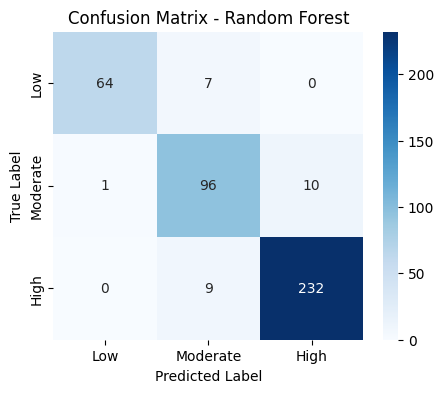

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, max_depth=120, min_samples_split=15, random_state=40)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_train, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Random Forest
**(Test Accuracy)**

Model Accuracy: 91.43%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.76      0.80      0.78        20
           2       0.99      0.96      0.97        71

    accuracy                           0.91       105
   macro avg       0.85      0.87      0.86       105
weighted avg       0.92      0.91      0.92       105



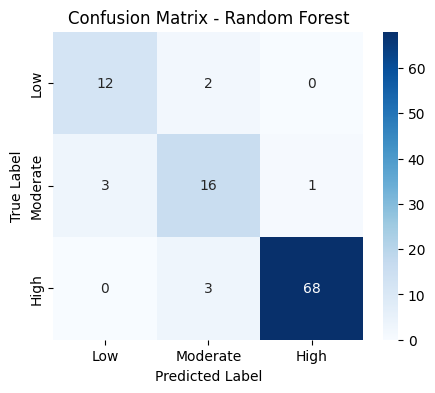

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=50, max_depth=120, min_samples_split=15, random_state=40)  # 100 trees in the forest
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# **Logistic Regression**

Training

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 98.57%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       0.96      0.98      0.97       107
           2       1.00      0.98      0.99       241

    accuracy                           0.99       419
   macro avg       0.98      0.99      0.98       419
weighted avg       0.99      0.99      0.99       419



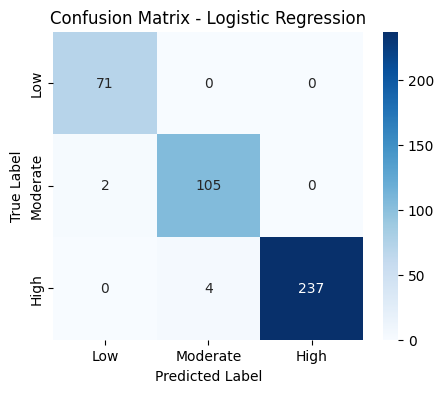

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)  # Multinomial Logistic Regression

log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_log)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_train, y_pred_log))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_train, y_pred_log), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Testing

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 96.19%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.90      0.90      0.90        20
           2       1.00      0.97      0.99        71

    accuracy                           0.96       105
   macro avg       0.92      0.96      0.94       105
weighted avg       0.96      0.96      0.96       105



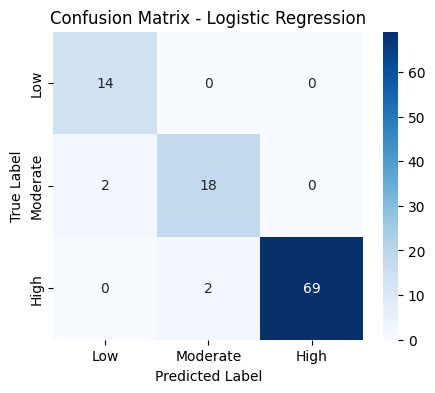

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)  # Multinomial Logistic Regression

log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_log)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# **Diabetes Type 2**

# **All Three Models**

In [9]:
def map_Heart(x):

    health_conditions = {
        "No pre-existing conditions": 0,
        "Heart disease": 1,
        "Hypertension": 0,
        "Diabetes": 0,
        "Asthma or breathing problems": 0
    }

    # Split responses and remove duplicates
    conditions = set(x.split(", "))

    # Sum the mapped values
    return sum(health_conditions.get(condition.strip().split(". ", 1)[-1], 0) for condition in conditions)

def map_Hyper(x):

    health_conditions = {
        "No pre-existing conditions": 0,
        "Heart disease": 0,
        "Hypertension": 1,
        "Diabetes": 0,
        "Asthma or breathing problems": 0
    }

    # Split responses and remove duplicates
    conditions = set(x.split(", "))

    # Sum the mapped values
    return sum(health_conditions.get(condition.strip().split(". ", 1)[-1], 0) for condition in conditions)

def map_Diabetes(x):

    health_conditions = {
        "No pre-existing conditions": 0,
        "Heart disease": 0,
        "Hypertension": 0,
        "Diabetes": 1,
        "Asthma or breathing problems": 0
    }

    # Split responses and remove duplicates
    conditions = set(x.split(", "))

    # Sum the mapped values
    return sum(health_conditions.get(condition.strip().split(". ", 1)[-1], 0) for condition in conditions)

def map_Asthma(x):

    health_conditions = {
        "No pre-existing conditions": 0,
        "Heart disease": 0,
        "Hypertension": 0,
        "Diabetes": 0,
        "Asthma or breathing problems": 1
    }

    # Split responses and remove duplicates
    conditions = set(x.split(", "))

    # Sum the mapped values
    return sum(health_conditions.get(condition.strip().split(". ", 1)[-1], 0) for condition in conditions)


df['Heart'] = df['Any pre-existing health conditions?  '].apply(map_Heart)
df['Hypertension'] = df['Any pre-existing health conditions?  '].apply(map_Hyper)
df['Asthma'] = df['Any pre-existing health conditions?  '].apply(map_Asthma)
df['Diabetes'] = df['Any pre-existing health conditions?  '].apply(map_Diabetes)

In [10]:



def calculate_risk_score(row):
    score = 0

    # Age Factor
    if row["Age"] >= 40:
        score += 3  # Older age increases risk
    elif 30 <= row["Age"] < 40:
        score += 2

    # Lifestyle Factors
    if row["Exercise Frequency"] == 0: score += 2  # No exercise → Higher risk
    if row["Activity Level"] == 0: score += 2  # Sedentary lifestyle → Higher risk
    if row["Sleep Duration"] == 0: score += 2  # Poor sleep → Higher risk

    # Health Conditions
    if row["Diabetes"] == 1:
        score += 7  # Pre-existing diabetes is a strong predictor
    if row["Hypertension"] == 1:
        score += 3  # High BP increases diabetes risk
    if row["Heart"] == 1:
        score += 2  # Heart disease is linked to diabetes

    # BMI Factor (Estimated)
    if row["Estimated BMI"] == "High (Overweight/Obese)":
        score += 3  # Obesity is a major risk factor
    elif row["Estimated BMI"] == "Moderate (Borderline Overweight)":
        score += 1

    #Stress
    if row["Stress_score"] == 2:  # High stress
      score += 2
    elif row["Stress_score"] == 1:  # Moderate stress
      score += 1

    return score

# Apply the updated function
df["Diabetes Risk Score"] = df.apply(calculate_risk_score, axis=1)

# Display first few rows
df.head()

# Convert Diabetes Risk Score to a binary target (High Risk = 1, Low Risk = 0)
df["Diabetes Risk"] = df["Diabetes Risk Score"].apply(lambda x: 1 if x >= 7 else 0)

# Define features and target
X = df[["Exercise Frequency", "Activity Level", "Sleep Duration", "Fitness Importance", "Estimated BMI"]]
y = df["Diabetes Risk"]

# Apply SMOTE to balance the dataset
#smote = SMOTE(sampling_strategy='auto', random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)
#X_resampled, y_resampled

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_forest = random_forest.predict(X_test)

# Evaluate models
def evaluate_model(name, y_test, y_pred):
    print(f"{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))  # Fix undefined precision
    print("-" * 50)


accuracy = accuracy_score(y_test, y_pred_log)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Logistic Regression \nClassification Report:\n", classification_report(y_test, y_pred_log))

print("Decision Tree \nClassification Report:\n", classification_report(y_test, y_pred_tree))

print("Random Forest \nClassification Report:\n", classification_report(y_test, y_pred_forest))


Model Accuracy: 93.33%
Logistic Regression 
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        78
           1       1.00      0.74      0.85        27

    accuracy                           0.93       105
   macro avg       0.96      0.87      0.90       105
weighted avg       0.94      0.93      0.93       105

Decision Tree 
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        78
           1       1.00      0.74      0.85        27

    accuracy                           0.93       105
   macro avg       0.96      0.87      0.90       105
weighted avg       0.94      0.93      0.93       105

Random Forest 
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        78
           1       1.00      0.74      0.85        27

    accuracy                        

#**Visualization**

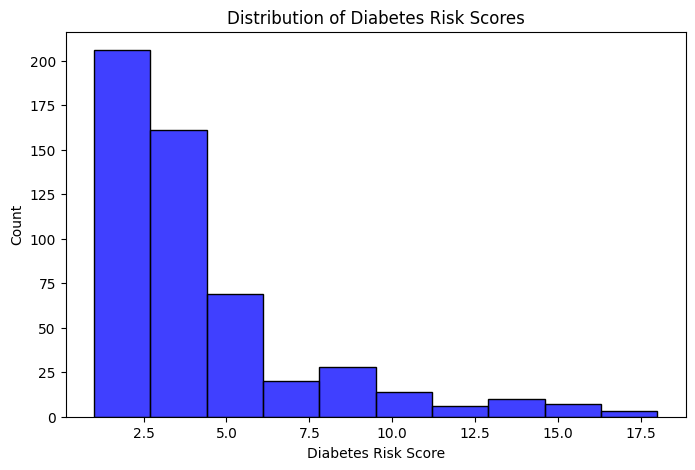

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["Diabetes Risk Score"], bins=10, color="blue")
plt.xlabel("Diabetes Risk Score")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Risk Scores")
plt.show()


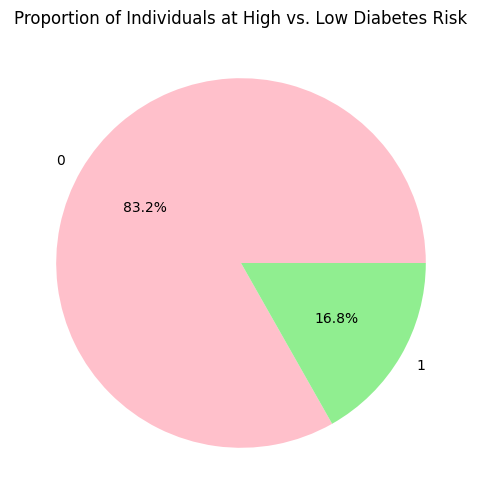

In [12]:
plt.figure(figsize=(6, 6))
df["Diabetes Risk"].value_counts().plot.pie(autopct="%1.1f%%", colors=["pink", "lightgreen"])
plt.title("Proportion of Individuals at High vs. Low Diabetes Risk")
plt.ylabel("")  # Hide y-axis label
plt.show()


<Figure size 800x500 with 0 Axes>

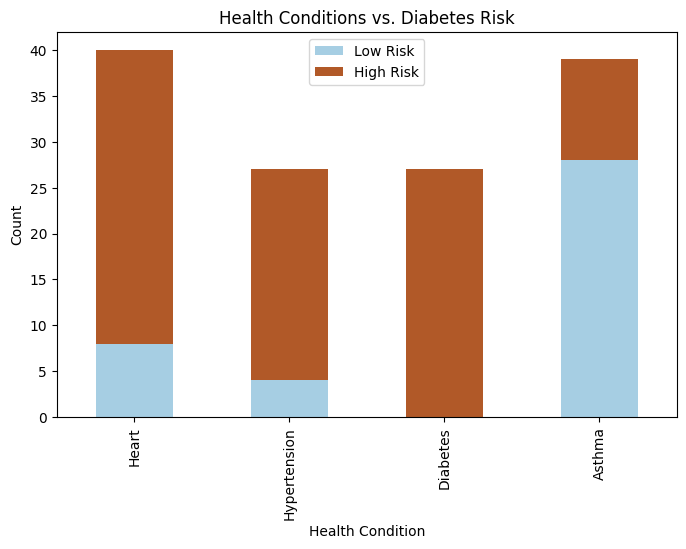

In [13]:
plt.figure(figsize=(8,5))
condition_cols = ["Heart", "Hypertension", "Diabetes", "Asthma"]
df.groupby("Diabetes Risk")[condition_cols].sum().T.plot(kind='bar', stacked=True, figsize=(8,5), colormap="Paired")
plt.title("Health Conditions vs. Diabetes Risk")
plt.xlabel("Health Condition")
plt.ylabel("Count")
plt.legend(["Low Risk", "High Risk"])
plt.show()


<Figure size 800x500 with 0 Axes>

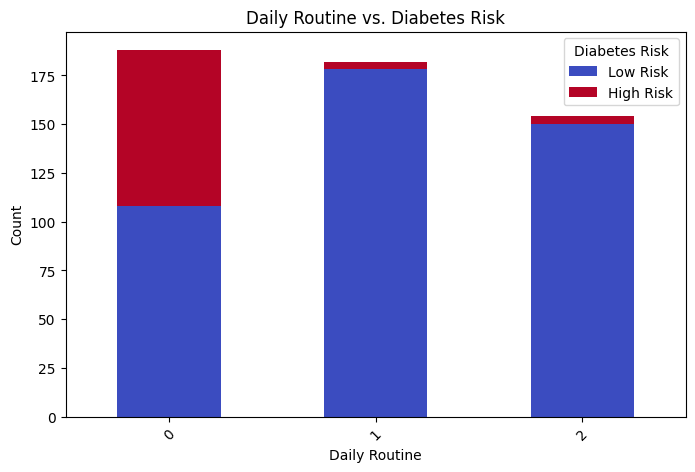

In [14]:
plt.figure(figsize=(8, 5))

# Group by Diabetes Risk and count occurrences of each routine
df.groupby("Diabetes Risk")["Activity Level"].value_counts().unstack().T.plot(
    kind='bar', stacked=True, figsize=(8, 5), colormap="coolwarm"
)

plt.title("Daily Routine vs. Diabetes Risk")
plt.xlabel("Daily Routine")
plt.ylabel("Count")
plt.legend(["Low Risk", "High Risk"], title="Diabetes Risk")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


<Figure size 800x500 with 0 Axes>

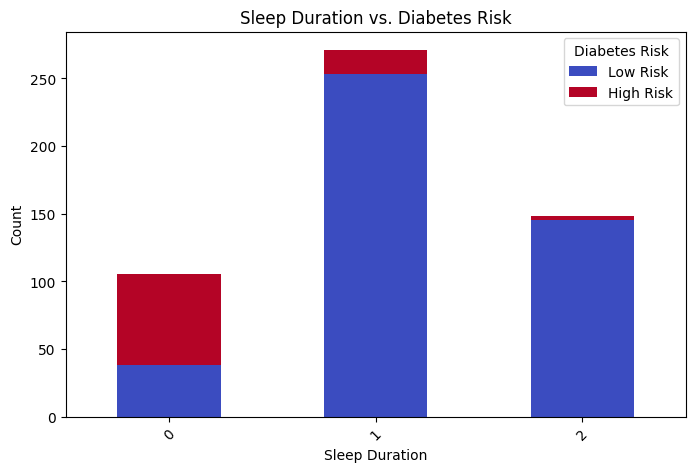

In [15]:
plt.figure(figsize=(8, 5))

# Group by Diabetes Risk and count occurrences of each routine
df.groupby("Diabetes Risk")["Sleep Duration"].value_counts().unstack().T.plot(
    kind='bar', stacked=True, figsize=(8, 5), colormap="coolwarm"
)

plt.title("Sleep Duration vs. Diabetes Risk")
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.legend(["Low Risk", "High Risk"], title="Diabetes Risk")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


<Figure size 800x500 with 0 Axes>

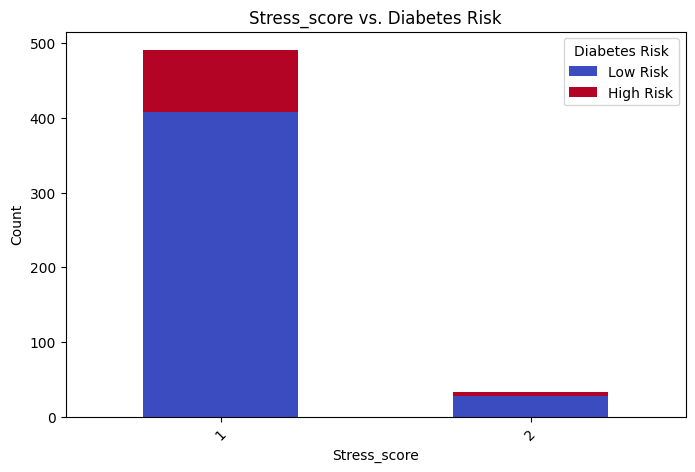

In [16]:
plt.figure(figsize=(8, 5))

# Group by Diabetes Risk and count occurrences of each routine
df.groupby("Diabetes Risk")["Stress_score"].value_counts().unstack().T.plot(
    kind='bar', stacked=True, figsize=(8, 5), colormap="coolwarm"
)

plt.title("Stress_score vs. Diabetes Risk")
plt.xlabel("Stress_score")
plt.ylabel("Count")
plt.legend(["Low Risk", "High Risk"], title="Diabetes Risk")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

<Figure size 1000x600 with 0 Axes>

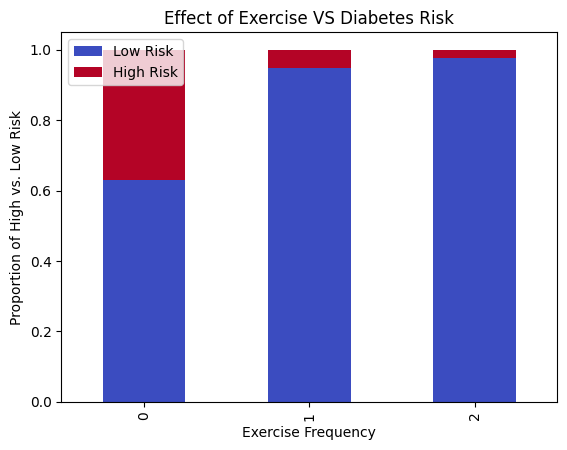

In [17]:
plt.figure(figsize=(10, 6))
df.groupby("Exercise Frequency")["Diabetes Risk"].value_counts(normalize=True).unstack().plot(
    kind="bar", stacked=True, colormap="coolwarm"
)
plt.xlabel("Exercise Frequency")
plt.ylabel("Proportion of High vs. Low Risk")
plt.title("Effect of Exercise VS Diabetes Risk")
plt.legend(["Low Risk", "High Risk"])
plt.show()


In [18]:
df.columns

Index(['Age', 'Any pre-existing health conditions?  ', 'Exercise Frequency',
       'Activity Level', 'exercise_duration', 'motivation_score',
       'Fitness Importance', 'health_condition_flag', 'Sleep Duration',
       'challenge_score', 'gym_interest', 'Gender_num', 'Diet_score',
       'Stress_score', 'Estimated BMI', 'risk_score', 'health_risk', 'Heart',
       'Hypertension', 'Asthma', 'Diabetes', 'Diabetes Risk Score',
       'Diabetes Risk'],
      dtype='object')

In [19]:
df.drop("Any pre-existing health conditions?  ",axis=1,inplace=True)
df.corr()

,Age,Exercise Frequency,Activity Level,exercise_duration,motivation_score,Fitness Importance,health_condition_flag,Sleep Duration,challenge_score,gym_interest,...,Stress_score,Estimated BMI,risk_score,health_risk,Heart,Hypertension,Asthma,Diabetes,Diabetes Risk Score,Diabetes Risk
Age,1.000000,-0.004704,-0.097775,0.070875,-0.012374,-0.016386,0.036411,-0.023691,-0.104640,-0.106508,...,-0.073298,0.062863,-0.027332,-0.041371,0.007738,0.050166,-0.058741,0.099928,0.223203,0.239615
Exercise Frequency,-0.004704,1.000000,0.613369,0.739377,0.516925,0.161681,-0.211054,0.408047,-0.017476,0.384459,...,0.031117,-0.595447,-0.773919,-0.736541,-0.206662,-0.134442,-0.010777,-0.124174,-0.570430,-0.399474
Activity Level,-0.097775,0.613369,1.000000,0.534804,0.431506,0.096886,-0.232373,0.473260,0.062124,0.451575,...,0.069668,-0.626848,-0.673629,-0.619249,-0.244584,-0.152741,0.040908,-0.174181,-0.602639,-0.445623
exercise_duration,0.070875,0.739377,0.534804,1.000000,0.467332,0.178464,-0.251913,0.415433,-0.020682,0.362302,...,0.018859,-0.468175,-0.776626,-0.713488,-0.250250,-0.150158,0.000630,-0.170248,-0.511994,-0.373257
motivation_score,-0.012374,0.516925,0.431506,0.467332,1.000000,0.168687,-0.312367,0.362213,0.114091,0.357855,...,0.023416,-0.334997,-0.495114,-0.390913,-0.284823,-0.206363,-0.043830,-0.168575,-0.464663,-0.355718
Fitness Importance,-0.016386,0.161681,0.096886,0.178464,0.168687,1.000000,-0.157864,-0.044845,-0.074604,0.049827,...,-0.046920,-0.136927,-0.427512,-0.323742,-0.106328,-0.027050,-0.134178,-0.074614,-0.177611,-0.170384
health_condition_flag,0.036411,-0.211054,-0.232373,-0.251913,-0.312367,-0.157864,1.000000,-0.375588,0.221334,-0.176930,...,0.009007,0.410819,0.540892,0.220056,0.618575,0.557427,0.549049,0.509847,0.706581,0.662788
Sleep Duration,-0.023691,0.408047,0.473260,0.415433,0.362213,-0.044845,-0.375588,1.000000,-0.075272,0.401909,...,-0.019447,-0.446868,-0.540735,-0.372317,-0.357087,-0.252920,-0.012649,-0.227898,-0.582025,-0.526964
challenge_score,-0.104640,-0.017476,0.062124,-0.020682,0.114091,-0.074604,0.221334,-0.075272,1.000000,0.146798,...,0.021224,0.138594,0.361064,0.213344,0.170278,0.149400,0.113238,0.056584,0.123178,0.152661
gym_interest,-0.106508,0.384459,0.451575,0.362302,0.357855,0.049827,-0.176930,0.401909,0.146798,1.000000,...,0.036476,-0.272163,-0.365631,-0.262550,-0.201594,-0.152642,0.079608,-0.135355,-0.401088,-0.294596
